In [ ]:
import pandas as pd
from pandas import to_numeric
import numpy as np
from keras import models
from keras import layers
from keras.layers import  LSTM, Dense, Dropout, SimpleRNN
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dropout
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import keras.utils as ku
from keras.preprocessing.sequence import pad_sequences


import tensorflow as tf



In [ ]:
#!pip install q keras==2.3.0
# previously it was Keras 2.4.3 in draco

In [ ]:
import keras
print(keras.__version__)
print(np.__version__)

2.4.3
1.18.5


In [ ]:
def dataset_preparation_rnn_lstm(__input_sequences__, __labels__):
  num_of_classes = 2
  input_sequences = __input_sequences__
  input_sequences = input_sequences.reshape(input_sequences.shape[0], input_sequences.shape[1], input_sequences.shape[2])
  labels = __labels__
  total_time_steps = __input_sequences__.shape[1]
  labels = ku.to_categorical(labels, num_classes = num_of_classes)
  return input_sequences, labels, total_time_steps, num_of_classes


In [ ]:

def create_model_rnn(input_sequences, label, total_time_steps, num_of_classes):
    model = Sequential()
    model.add(SimpleRNN(units=254, input_shape=(input_sequences.shape[1], input_sequences.shape[2]),
                                              return_sequences=True))
    model.add(SimpleRNN(units=128, return_sequences=False))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(input_sequences, label, epochs=5, verbose=1,
                        validation_split = 0.2)
    model.save("2_Simple_RNN_254Units_binary_crossentropy_adam.h5")
    print(model.summary())
    return model, history

In [ ]:
f = open("acc_8.txt", "a")

In [ ]:
for i in range(13, 14):
  # load time_step_data
  ts_st = str(i) + '_time_step_50_features_4_data.npy'
  time_step_data = np.load(ts_st)
  #time_step_data = time_step_data[:100]

  # load time_step_data
  labels_st = str(i) + '_time_step_50_features_4_labels.npy'
  labels_data = np.load(labels_st)
  #labels_data = labels_data[:100]

  '''
  print(time_step_data.shape)
  print(labels_data.shape)
  '''

  train_X, test_X, train_labels, test_labels = train_test_split(time_step_data, 
                                                              labels_data, 
                                                              test_size = 0.2,
                                                              random_state = 0)
  
  '''                                                            
  print('Training Features Shape:', train_X.shape)
  print('Training Labels Shape:', train_labels.shape)
  print()
  print('Testing Features Shape:', test_X.shape)
  print('Testing Labels Shape:', test_labels.shape)
  '''

  input_sequences, input_labels, total_time_steps, num_of_classes = dataset_preparation_rnn_lstm(train_X, train_labels)
  model, history = create_model_rnn(input_sequences, input_labels, total_time_steps, num_of_classes)
  # evaluate the model
  _, train_acc = model.evaluate(input_sequences, input_labels, verbose=0)
  print("======================DONE==========================")
  st = 'src= '+ str(i) + ' train_acc ' + str(train_acc) + '\n'
  print(st)
  f.write(st)

f.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50, 254)           65786     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               49024     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 115,068
Trainable params: 115,068
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
4996/4996 [==============================] - 264s 53ms/step - loss: 0.5159 - accuracy: 0.7375 - val_loss: 0.4835 - val_accuracy: 0.7593
Epoch 2/5
4996/4996 [==============================] - 274s 55ms/step - loss: 0.5087 - accuracy: 0.7406 - val_loss: 0.4902 - val_accuracy: 0.7403
Epoch 3/5
4996/4996 [==============================] - 281s 56ms/step - loss: 0.503

(250693, 50, 2)
(250693,)
[0 1 1 ... 1 1 1]


** Label Data **

In [ ]:
print(time_step_data[0])
print(labels_data[0])

0


In [ ]:
# convert labels to to_categorical
labels_data_categorical = ku.to_categorical(labels_data, num_classes = 2)
labels_data_categorical.astype(np.int)

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
# Split the data into training and testing sets


train_X, test_X, train_labels, test_labels = train_test_split(time_step_data, 
                                                              labels_data_categorical, 
                                                              test_size = 0.2,
                                                              random_state = 0)
'''

train_size = int(time_step_data.shape[0] * 0.8)
train_X, test_X = time_step_data[0:train_size], time_step_data[train_size:time_step_data.shape[0]]
train_labels, test_labels = labels_data_categorical[0:train_size], labels_data_categorical[train_size:time_step_data.shape[0]]
'''

'\n\ntrain_size = int(time_step_data.shape[0] * 0.8)\ntrain_X, test_X = time_step_data[0:train_size], time_step_data[train_size:time_step_data.shape[0]]\ntrain_labels, test_labels = labels_data_categorical[0:train_size], labels_data_categorical[train_size:time_step_data.shape[0]]\n'

In [ ]:
print('Training Features Shape:', train_X.shape)
print('Training Labels Shape:', train_labels.shape)
print()
print('Testing Features Shape:', test_X.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (200304, 100, 2)
Training Labels Shape: (200304, 2)

Testing Features Shape: (50077, 100, 2)
Testing Labels Shape: (50077, 2)


In [ ]:
def dataset_preparation_rnn_lstm(__input_sequences__, __labels__):
  num_of_classes = 2
  input_sequences = __input_sequences__
  input_sequences = input_sequences.reshape(input_sequences.shape[0], input_sequences.shape[1], input_sequences.shape[2])
  labels = __labels__
  total_time_steps = __input_sequences__.shape[1]
  #labels = ku.to_categorical(labels, num_classes = num_of_classes)
  return input_sequences, labels, total_time_steps, num_of_classes


In [ ]:
input_sequences, input_labels, total_time_steps, num_of_classes = dataset_preparation_rnn_lstm(train_X, train_labels)

In [ ]:
print(input_sequences.shape)
print(input_labels.shape)
print(total_time_steps)
print(num_of_classes)

(200304, 100, 2)
(200304, 2)
100
2


In [ ]:
def create_model_rnn(input_sequences, label, total_time_steps, num_of_classes):
    model = Sequential()
    model.add(SimpleRNN(units=254, input_shape=(input_sequences.shape[1], input_sequences.shape[2]),
                                              return_sequences=True))
    model.add(SimpleRNN(units=128, return_sequences=False))
    model.add(Dense(num_of_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    history = model.fit(input_sequences, label, epochs=20, verbose=1,
                        validation_split = 0.2)
    model.save("2_Simple_RNN_254Units_binary_crossentropy_adam.h5")
    print(model.summary())
    return model, history

In [ ]:
model, history = create_model_rnn(input_sequences, input_labels, total_time_steps, num_of_classes)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 100, 254)          65278     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               49024     
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 114,560
Trainable params: 114,560
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
5008/5008 [==============================] - 610s 122ms/step - loss: 0.4975 - accuracy: 0.7895 - val_loss: 0.4890 - val_accuracy: 0.7888
Epoch 2/20
5008/5008 [==============================] - 641s 128ms/step - loss: 0.4940 - accuracy: 0.7907 - val_loss: 0.4944 - val_accuracy: 0.7884
Epoch 3/20
5008/5008 [==============================] - 671s 134ms/step - loss:

In [ ]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

(1e-08, 0.0001, 0.0, 60.0)

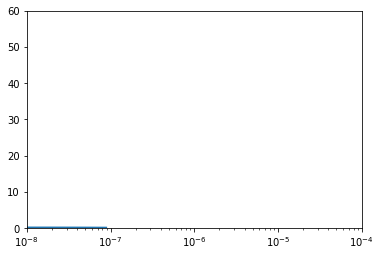

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

**Basic LSTM**

In [ ]:
def create_model_lstm(input_sequences, label, total_time_steps, num_of_classes):
    print(input_sequences.shape)
    print(label.shape)
    model = Sequential()
    model.add(LSTM(256, input_shape=(input_sequences.shape[1], input_sequences.shape[2]), return_sequences = True))
    #model.add(Dropout(0.2))
    model.add(LSTM(128, return_sequences = False))
    model.add(Dense(num_of_classes, kernel_initializer='random_uniform', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(input_sequences, label, epochs=5, verbose=1,
                        validation_split = 0.2)
    # serialize weights to HDF5
    model.save("LSTM_50TS_7F.h5")
    print(model.summary())
    return model, history

In [ ]:
model, history = create_model_lstm(input_sequences, input_labels, total_time_steps, num_of_classes)


(200554, 50, 2)
(200554, 2)
Epoch 1/5
 268/5014 [>.............................] - ETA: 18:22 - loss: 0.4876 - accuracy: 0.7922

KeyboardInterrupt: ignored

In [ ]:
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# predict the test cases
test_input_sequences, test_input_labels, total_time_steps, num_of_classes = dataset_preparation_rnn_lstm(test_X, test_labels)